# Objective

This code executes **segmentwise comparative shape analysis** on the point clouds for amphoras YA7_Y114 and YA7_Y128 from the Yassiada site. This analysis includes the following:

- Outlier detection for each graduated segment of the amphoras:
     - detects and screens for outliers
     - optionally outputs a .csv file containing coordinates with all non-outliers only, in order to avoid repeating this computation


- Cloud-to-cloud distance comparison over all graduated segments of the amphoras:
    - visualization of the change in average point-to-point distance between the two segment point clouds across all graduated segments of the amphoras
        - optionally scale the average point-to-point distance for each segment by the max diameter of that segment

# I/O
**Inputs:**
 - a point/mesh cloud (.obj format) from each of two amphoras for each graduated segment

**Outputs:**
 - each input segment with outliers removed
 - the average mesh-to-mesh distance between the amphoras at each graduated segment
 - a visualization of the distribution of these average distances
 
# Description
This notebook is the user interface for the analysis. Before running the notebook, the user assigns values to the variables in the cell (i.e. block of code) under the heading "User Inputs;" this is the only cell that the user should ever edit. The subsequent cells perform the cleaning and analysis of the point clouds.

Most of the code and computational logic have been abstracted away from this notebook and consolidated in a separate utility file in order to leave this notebook user interface clean and uncluttered. I.e. the utility file is where I wrote the code which actually does the heavy lifting; this notebook uses that toolkit.

## Imports
Import modules and other required dependencies.
- **util** : the module written by me, containing amphora point cloud analysis methods
- **matplotlib** : a module that helps make nice plots

In [1]:
import sys, os
sys.path.insert(0,'../../')
import util
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## User Inputs
Define some information that the code needs to know. This cell is the only cell that the user should edit.

In [2]:
segments = ['01', '12', '23', '34', '45', '56']
max_diameters = [90, 130, 299, 425, 185, 239]    # the maximum diameter of each segment
amphora_names = ['Y114', 'Y128']
path_to_segments = os.getcwd() + '/segments'
save_nonoutliers = True   # whether or not to save csv files of point cloud coordinates with all outliers excluded.
                           # Set True if these files do not yet exist, else False.
save_distances = True     # whether or not to save csv files of nearest-neighbor distances between objects.
                           # Set True if these files do not yet exist, else False.

## Outlier Removal
Outlier points are identified as points which are not close enough to other points.
Closeness threshold is the Otsu threshold as computed on the bimodal point-to-point distance distribution.

#### Read in object, convert to numpy array.
Read in a point cloud file and store as a matrix.

#### Remove outlier points. 
Remove outlier points and optionally output a .csv file containing coordinates with all non-outliers only, in order to avoid repeating this computation. If this computation has already been run for these .obj files, set **save_nonoutliers** in the above cell (i.e. block of code) to True. Otherwise, set **save_nonoutliers** to False to avoid recreating the .csv files. (See comments for "save_nonoutliers" above.)

In [3]:
for segment in segments:
    
    print segment # Allows the user to see which segment the code is working on
    
    # Read Object 0
    obj0_filepath = path_to_segments + '/' + segment + '/' + segment + '_' + amphora_names[0] + '.obj'
    obj0_coords = util.obj_to_np(obj0_filepath)
    
    # Remove Object 0 outlier points
    obj0_csv_filename = segment+'_'+amphora_names[0]+'.csv'    
    obj0_coords = util.remove_outliers(obj0_coords, save_nonoutliers, obj0_csv_filename)

    # Read Object 1
    obj1_filepath = path_to_segments + '/' + segment + '/' + segment + '_' + amphora_names[1] + '.obj'
    obj1_coords = util.obj_to_np(obj1_filepath)
    
    # Remove Object 1 outlier points
    obj1_csv_filename = segment+'_'+amphora_names[1]+'.csv'
    obj1_coords = util.remove_outliers(obj1_coords, save_nonoutliers, obj1_csv_filename)

01
12
23
34
45
56


^ Each of these are status messages, which print while the program is running when the corresponding segment is being evaluated.

## Cloud-to-Cloud Distance Comparison
For each segment, calculate the mean distance from each point in Object 1 to the nearest neighbor in Object 2.

In [4]:
average_distances = []
stdev_distances = []

for segment in segments:
    
    print segment # so the user can see which segment the code is working on
    
    obj0_csv_filename = segment+'_'+amphora_names[0]+'.csv'
    obj1_csv_filename = segment+'_'+amphora_names[1]+'.csv'
    
    filename = segment+'_'+amphora_names[0]+'_'+amphora_names[1]+'_distances.csv'
    average_distance, stdev_distance = util.get_avg_cc_dist(obj0_csv_filename, obj1_csv_filename, save_distances, filename)
    
    average_distances.append(average_distance)
    stdev_distances.append(stdev_distance)

01
12
23
34
45
56


^ Each of these are status messages, which print while the program is running when the corresponding segment is being evaluated.

### Visualize average distances across segments

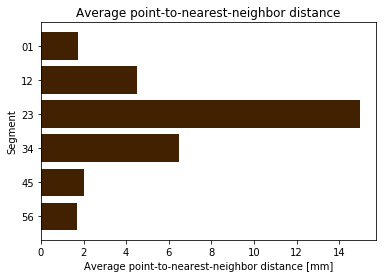

In [5]:
fig, ax = plt.subplots()
y_pos = np.arange(len(segments))
ax.barh(y_pos, average_distances, color='#412100')
ax.set_yticks(y_pos)
ax.set_yticklabels(segments)
ax.invert_yaxis()
ax.set_xlabel('Average point-to-nearest-neighbor distance [mm]')
ax.set_ylabel('Segment')
ax.set_title('Average point-to-nearest-neighbor distance')

### Visualize average distances across segments, scaled for each segment's max diameter

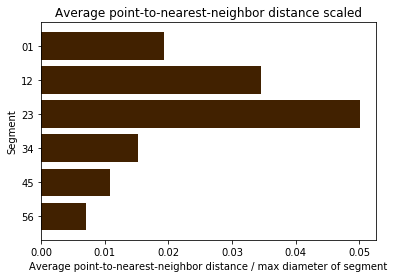

In [6]:
fig, ax = plt.subplots()
y_pos = np.arange(len(segments))
average_distances_scaled = [dist/dia for dist, dia in zip(average_distances, max_diameters)]
ax.barh(y_pos, average_distances_scaled, color='#412100')
ax.set_yticks(y_pos)
ax.set_yticklabels(segments)
ax.invert_yaxis()
ax.set_xlabel('Average point-to-nearest-neighbor distance / max diameter of segment')
ax.set_ylabel('Segment')
ax.set_title('Average point-to-nearest-neighbor distance scaled')

### Visualize the spread of distances across segments

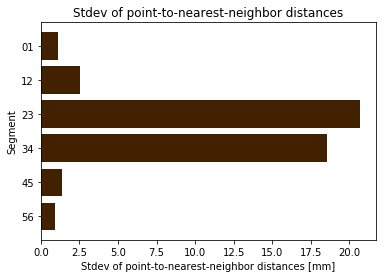

In [7]:
fig, ax = plt.subplots()
y_pos = np.arange(len(segments))
ax.barh(y_pos, stdev_distances, color='#412100')
ax.set_yticks(y_pos)
ax.set_yticklabels(segments)
ax.invert_yaxis()
ax.set_xlabel('Stdev of point-to-nearest-neighbor distances [mm]')
ax.set_ylabel('Segment')
ax.set_title('Stdev of point-to-nearest-neighbor distances')

# Full Visualization

The results of average-NND (nearest neighbor distance) shape comparison are most intuitive when the above plot is displayed next to amphora renderings.

### Absolute Average Distances

<img src="Y114_Y128_fig_avg.png" style="width: 800px;"/>

### Average Distances Scaled by Max Segment Diameter

<img src="Y114_Y128_fig_avg_scaled.png" style="width: 800px;"/>

### Spread of Distances Across Segments

<img src="Y114_Y128_fig_std.png" style="width: 800px;"/>

# Discussion

The distribution of average distances and spread of distances for each segment of these amphoras is very consistent with these distributions for the segmentwise comparison of amphoras Y114 and 86-93:

We see large differences between amphoras YA7_Y114 and YA7_86-99 in the neck region and the smallest differences in the body region. The rim (01) is somewhat hand-sculpted but can be directly measured than the neck (12), which is harder to control. The two higher body segments (23 and 34) are well-controlled while the lowest body segment (45) may have experienced varying degrees of sag. The flattish bases (56) of these amphoras align well. The spread of points on YA7_86-99 with close nearest neighbors on YA7_Y114 and points on YA7_86-99 with far nearest neighbors on YA7_Y114 is greatest at the neck (12), then drops down at the top of the body (23) and increases as we go down the amphora.